In [43]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [44]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                     
bitcoin                              6.57509                      7.67258   
ethereum                             4.80849                      0.13169   
tether                               0.00640                     -0.04237   
ripple                               2.24984                      0.23455   
bitcoin-cash                        14.75334                     15.74903   
binancecoin                          6.80688                      0.05865   
chainlink                            9.30098                    -11.21747   
cardano                              5.55476                     10.10553   
litecoin                             7.28931                      1.21662   
bitcoin-cash-sv                     -1.86656                      2.88926   

                 price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                      
bitcoin                             -3.25185                      83.51840   
ethereum                           -12.88890                     186.77418   
tether                               0.28037                      -0.00542   
ripple                             -17.55245                      39.53888   
bitcoin-cash                       -13.71793                      21.66042   
binancecoin                         36.33486                     155.61937   
chainlink                          -43.69522                     403.22917   
cardano                            -22.84776                     264.51418   
litecoin                           -17.23960                      27.49919   
bitcoin-cash-sv                    -24.87434                       7.42562   

                 price_change_percentage_1y  
coin_id                                      
bitcoin                            37.51761  
ethereum                          101.96023  
tether                              0.01954  
ripple                            -16.60193  
bitcoin-cash                       14.49384  
binancecoin                        69.69195  
chainlink                         325.13186  
cardano                           156.09756  
litecoin                          -12.66408  
bitcoin-cash-sv                    93.73082

In [45]:
# Generate summary statistics
df_market_data.describe()

price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%                       0.109740                    -0.042370   
75%                       5.510740                     4.578130   
max                      24.239190                   140.795700   

       price_change_percentage_60d  price_change_percentage_200d  \
count                    41.000000                     41.000000   
mean                     -0.094119                    236.537432   
std                      47.365803                    435.225304   
min                     -44.822480                     -0.392100   
25%                     -25.907990                     21.660420   
50%                      -7.544550                     83.905200   
75%                       0.657260                    216.177610   
max                     223.064370                   2227.927820   

       price_change_percentage_1y  
count                   41.000000  
mean                   347.667956  
std                   1247.842884  
min                    -17.567530  
25%                      0.406170  
50%                     69.691950  
75%                    168.372510  
max                   7852.089700

In [46]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [47]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [48]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index

# Set the coin_id column as index
df_scaled.index = crypto_names

# Display the scaled DataFrame
df_scaled.head()

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610                     0.545842   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                         -0.067495                     -0.355953   
ethereum                        -0.273483                     -0.115759   
tether                           0.008005                     -0.550247   
ripple                          -0.373164                     -0.458259   
bitcoin-cash                    -0.291203                     -0.499848   

              price_change_percentage_1y  
coin_id                                   
bitcoin                        -0.251637  
ethereum                       -0.199352  
tether                         -0.282061  
ripple                         -0.295546  
bitcoin-cash                   -0.270317

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [49]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [50]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

In [51]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

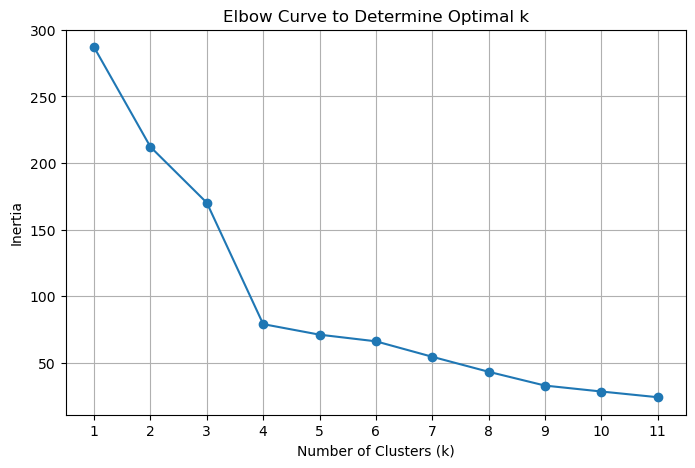

In [52]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Determine Optimal k")
plt.xticks(df_elbow["k"])
plt.grid(True)

# Show the plot
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** To find the best value for k, I had to look for the elbow point in the curve. This is where the inertia begins to decrease at a slower rate. From looking at the Elbow Curve, the biggest drop in inertia happens from K1 to K3. After K4, the rate of decrease slows significantly, with the curve flattening around K4 to K5.

That being said, the best value for K would likely be K4 or K5. Beyond these points, the reduction in inertia is minimal.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [53]:
# Initialize the K-Means model using the best value for k
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

In [54]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [55]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_predictions = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_predictions)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [56]:
# Create a copy of the scaled DataFrame
df_clustered = df_scaled.copy()

In [57]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clustered["Cluster"] = kmeans_model.labels_

# Display the copy of the scaled DataFrame
df_clustered.head()

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610                     0.545842   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                         -0.067495                     -0.355953   
ethereum                        -0.273483                     -0.115759   
tether                           0.008005                     -0.550247   
ripple                          -0.373164                     -0.458259   
bitcoin-cash                    -0.291203                     -0.499848   

              price_change_percentage_1y  Cluster  
coin_id                                            
bitcoin                        -0.251637        0  
ethereum                       -0.199352        0  
tether                         -0.282061        2  
ripple                         -0.295546        2  
bitcoin-cash                   -0.270317        0

In [58]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["Cluster"],
    title="Cryptocurrency Clusters Based on Price Change (24h vs 7d)",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)",
    width=800,
    height=500)

# Display the plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [59]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [60]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_transformed = pca_model.fit_transform(df_clustered.drop(columns=["Cluster"]))
df_pca = pd.DataFrame(pca_transformed, columns=["PC1", "PC2", "PC3"], index=df_clustered.index)

df_pca["Cluster"] = df_clustered["Cluster"]

print(df_pca.head())

                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [61]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The explained variance ratio for each principal components is: PC1- 37.20%, PC2- 34.70%, PC3- 17.60%
Together, the 3 components explain 89.3% of the total variance in the dataset.

In [62]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(
    pca_transformed,
    columns=["PC1", "PC2", "PC3"],
    index=df_clustered.index)

# Add the cluster labels back to the PCA DataFrame
df_pca["Cluster"] = df_clustered["Cluster"]

# Copy the crypto names from the original scaled DataFrame
crypto_names = df_clustered.index

# Set the coin_id column as index
df_pca.index = crypto_names

# Display the scaled PCA DataFrame
df_pca

PC1       PC2       PC3  Cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        0
ethereum             -0.458261  0.458466  0.952877        0
tether               -0.433070 -0.168126 -0.641752        2
ripple               -0.471835 -0.222660 -0.479053        2
bitcoin-cash         -1.157800  2.041209  1.859715        0
binancecoin          -0.516534  1.388377  0.804071        0
chainlink            -0.450711  0.517699  2.846143        0
cardano              -0.345600  0.729439  1.478013        0
litecoin             -0.649468  0.432165  0.600303        0
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        2
crypto-com-chain     -0.248198 -1.376252 -1.462026        2
usd-coin             -0.438408 -0.175337 -0.663388        2
eos                  -0.693425 -0.473815 -0.527597        2
monero                0.060499  2.909404  1.498571        0
tron                 -0.393352 -0.108192 -0.012756        2
tezos                -0.796176 -0.494409  1.082812        0
okb                   0.064075 -1.269825 -1.098829        2
stellar              -0.489015 -0.732719 -0.062543        2
cosmos               -0.306272  0.703415  1.714224        0
cdai                 -0.513528 -0.142802 -0.656566        2
neo                  -0.362120 -0.986914 -0.728752        2
wrapped-bitcoin      -0.604265  0.827398  0.439316        0
leo-token            -0.413296 -0.674115 -1.076628        2
huobi-token          -0.407483 -0.212507 -0.351426        2
nem                   0.608974  0.563532 -1.148742        2
binance-usd          -0.450211 -0.151019 -0.647401        2
iota                 -0.764665 -0.517886  0.204990        2
vechain              -0.556315 -1.938209 -1.261776        2
zcash                -0.425147  0.492976  1.058048        0
theta-token           2.676868 -0.013954 -1.965207        2
dash                 -0.613923 -0.479337  0.339565        2
ethereum-classic     -0.579924 -0.356334 -0.114942        2
ethlend               8.089018 -3.896891  2.301382        3
maker                -0.389045  0.165041  0.379414        0
havven                0.865762 -2.261882  0.275583        2
omisego               0.111675  0.428316 -1.205398        2
celsius-degree-token  4.792395  6.767679 -1.986985        1
ontology             -0.632355 -2.108117 -0.652227        2
ftx-token            -0.593142  0.021485  0.209911        2
true-usd             -0.458131 -0.135734 -0.635284        2
digibyte             -0.297910 -0.191126 -0.909602        2

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [63]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))

In [64]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values_pca:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
# 2. Fit the model to the data using `df_market_data_pca
    kmeans_pca.fit(df_pca.drop(columns=["Cluster"]))
# 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)


In [67]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k_values_pca,
    "inertia": inertia_values_pca}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

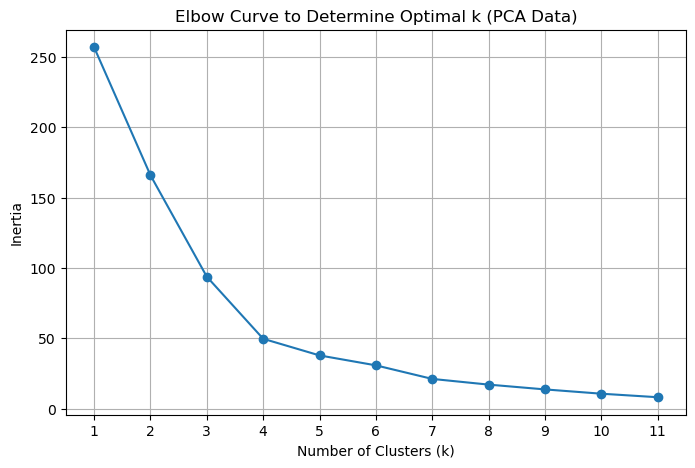

In [69]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Determine Optimal k (PCA Data)")
plt.xticks(df_elbow_pca["k"])
plt.grid(True)

# Show the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** From viewing the Elbow Curve, the best value for k appears to be 4 or 5, since the inertia drops alot up to this point and starts to level off, similar to the first line chart.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best value for K using the PCA data is consistent with the best K value found using the original data. This shows that the clustering structure remains stable even after implementing the PCA data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [60]:
# Initialize the K-Means model using the best value for k
optimal_k_pca = 4
kmeans_pca_model = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)

In [61]:
# Fit the K-Means model using the PCA data
kmeans_pca_model.fit(df_pca.drop(columns=["Cluster"]))

KMeans(n_clusters=4, n_init=10, random_state=42)

In [62]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_cluster_predictions = kmeans_pca_model.predict(df_pca.drop(columns=["Cluster"]))

# Print the resulting array of cluster values.
print(pca_cluster_predictions)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [63]:
# Create a copy of the scaled PCA DataFrame
df_pca_clustered = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_clustered["Cluster"] = pca_cluster_predictions

# Display the copy of the scaled PCA DataFrame
df_pca_clustered

PC1       PC2       PC3  Cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        0
ethereum             -0.458261  0.458466  0.952877        0
tether               -0.433070 -0.168126 -0.641752        2
ripple               -0.471835 -0.222660 -0.479053        2
bitcoin-cash         -1.157800  2.041209  1.859715        0
binancecoin          -0.516534  1.388377  0.804071        0
chainlink            -0.450711  0.517699  2.846143        0
cardano              -0.345600  0.729439  1.478013        0
litecoin             -0.649468  0.432165  0.600303        0
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        2
crypto-com-chain     -0.248198 -1.376252 -1.462026        2
usd-coin             -0.438408 -0.175337 -0.663388        2
eos                  -0.693425 -0.473815 -0.527597        2
monero                0.060499  2.909404  1.498571        0
tron                 -0.393352 -0.108192 -0.012756        2
tezos                -0.796176 -0.494409  1.082812        0
okb                   0.064075 -1.269825 -1.098829        2
stellar              -0.489015 -0.732719 -0.062543        2
cosmos               -0.306272  0.703415  1.714224        0
cdai                 -0.513528 -0.142802 -0.656566        2
neo                  -0.362120 -0.986914 -0.728752        2
wrapped-bitcoin      -0.604265  0.827398  0.439316        0
leo-token            -0.413296 -0.674115 -1.076628        2
huobi-token          -0.407483 -0.212507 -0.351426        2
nem                   0.608974  0.563532 -1.148742        2
binance-usd          -0.450211 -0.151019 -0.647401        2
iota                 -0.764665 -0.517886  0.204990        2
vechain              -0.556315 -1.938209 -1.261776        2
zcash                -0.425147  0.492976  1.058048        0
theta-token           2.676868 -0.013954 -1.965207        2
dash                 -0.613923 -0.479337  0.339565        2
ethereum-classic     -0.579924 -0.356334 -0.114942        2
ethlend               8.089018 -3.896891  2.301382        3
maker                -0.389045  0.165041  0.379414        0
havven                0.865762 -2.261882  0.275583        2
omisego               0.111675  0.428316 -1.205398        2
celsius-degree-token  4.792395  6.767679 -1.986985        1
ontology             -0.632355 -2.108117 -0.652227        2
ftx-token            -0.593142  0.021485  0.209911        2
true-usd             -0.458131 -0.135734 -0.635284        2
digibyte             -0.297910 -0.191126 -0.909602        2

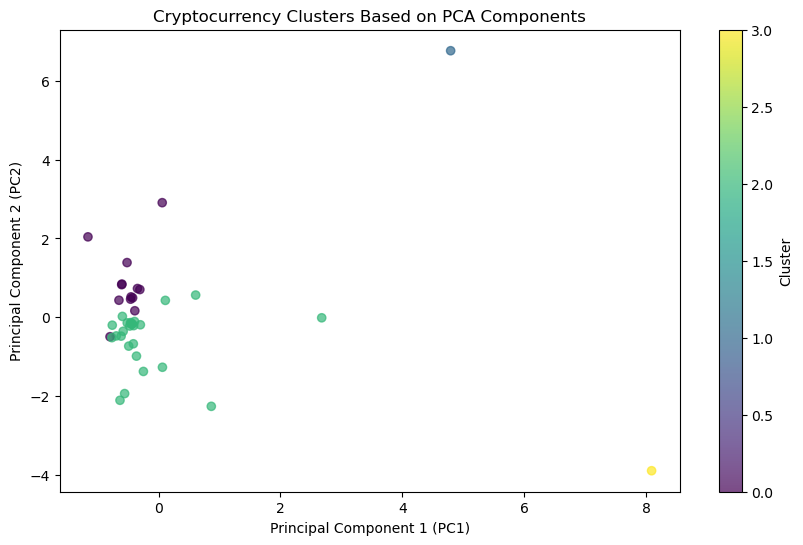

In [64]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_pca_clustered["PC1"],
    df_pca_clustered["PC2"],
    c=df_pca_clustered["Cluster"],
    cmap="viridis",
    alpha=0.7)

# Add labels and title
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Cryptocurrency Clusters Based on PCA Components")
plt.colorbar(label="Cluster")

# Show the plot
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

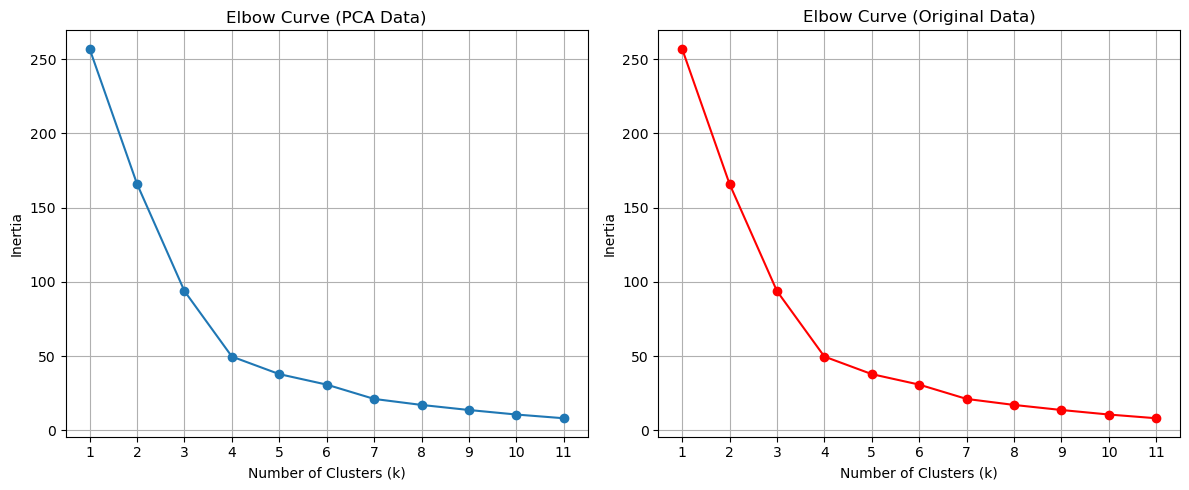

In [65]:
# Composite plot to contrast the Elbow curves
# Set up the figure
plt.figure(figsize=(12, 5))

# Plot Elbow Curve for original scaled data
plt.subplot(1, 2, 1)
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker="o", linestyle="-", label="PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve (PCA Data)")
plt.xticks(df_elbow_pca["k"])
plt.grid(True)

# Plot Elbow Curve for PCA-transformed data
plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker="o", linestyle="-", color="r", label="PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve (Original Data)")
plt.xticks(df_elbow_pca["k"])
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

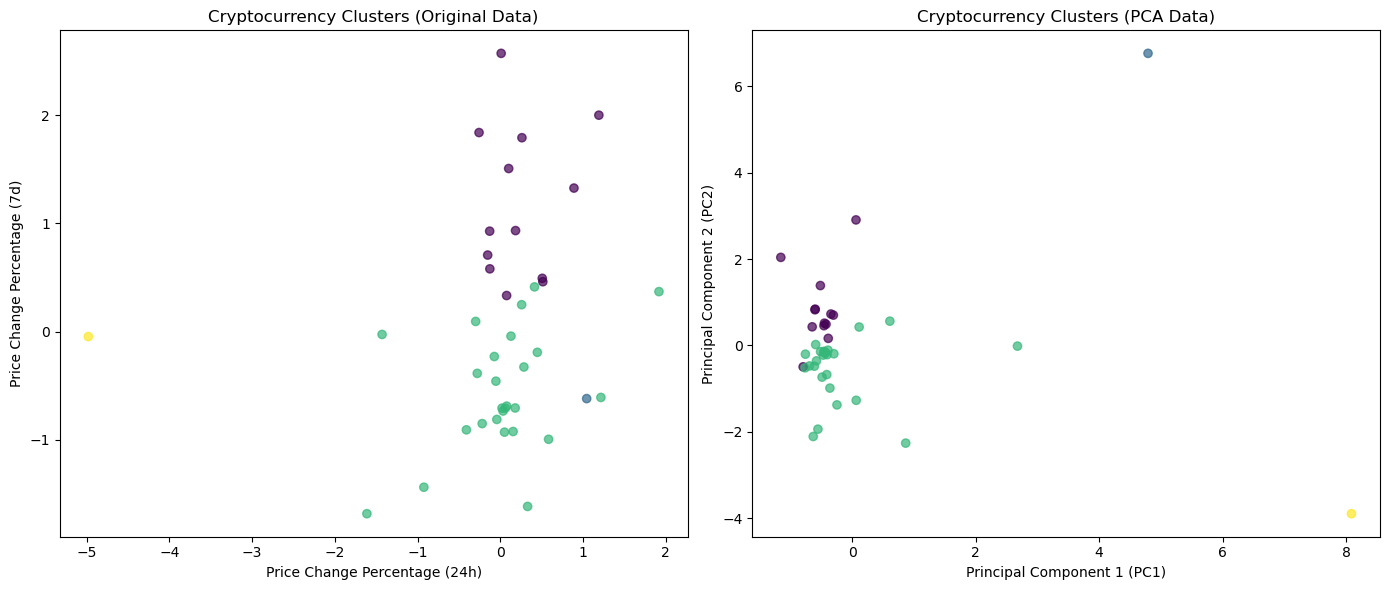

In [66]:
# Composite plot to contrast the clusters
# Create a composite plot to contrast the clusters (Original vs. PCA)

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for original scaled data clusters
axes[0].scatter(
    df_clustered["price_change_percentage_24h"],
    df_clustered["price_change_percentage_7d"],
    c=df_clustered["Cluster"],
    cmap="viridis",
    alpha=0.7
)
axes[0].set_xlabel("Price Change Percentage (24h)")
axes[0].set_ylabel("Price Change Percentage (7d)")
axes[0].set_title("Cryptocurrency Clusters (Original Data)")

# Scatter plot for PCA-transformed data clusters
axes[1].scatter(
    df_pca_clustered["PC1"],
    df_pca_clustered["PC2"],
    c=df_pca_clustered["Cluster"],
    cmap="viridis",
    alpha=0.7
)
axes[1].set_xlabel("Principal Component 1 (PC1)")
axes[1].set_ylabel("Principal Component 2 (PC2)")
axes[1].set_title("Cryptocurrency Clusters (PCA Data)")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features through PCA has a few key impacts on clustering with K-Means. Such as:
  * Making K-Means clustering more faster and efficient by reducing the number of features from original dataset to just 3 principal components.
  * Removing redundant or highly correlated features, leading to more stable cluster assignments and overall reduced overfitting.
  * Clustering with PC1 & PC2 makes it easier to visually interpret clusters in a 2D scatter plot.